# 모형결합 (model combining)
## 앙상블 방법론 (ensemble methods)
* 예측 성능을 향상시키기 위해서 하나의 모형이 아닌 여러개의 모형을 결합하는 방법
* 장점 : 과적합 방지 등을 통해 성능 향상
* 단점 : 단일 모형을 사용하는 것 보다 계산량 증가

# 앙상블 방법론 - 취합(aggregation) & 부스팅(boosting)
## 취합(aggregation)
* 사용할 모형의 집합을 처음부터 **고정**함
* Ex : 다수결(Majority Voting), 배깅(Bagging), 랜덤포레스트(Random Forest)
    -  다수결 방법(Majority Voting)
        * 여러 종류의 모형들 중 가장 좋은 결과를 가진 모델 채택
        * 채택 방법 :
            * Hard Voting
                * 단순 투표, 가장 많이 나온 결과를 채택 (Dafault)
            * Soft Voting
                * 가중치 투표, 개별 모형의 조건부 확률들을 합한 것들 중 가장 큰 것을 재택함
    - 배깅(Bagging)
        * 같은 모형을 사용하지만 같은 데이터 샘플을 중복으로 사용하여, 서로 다른 결과를 출력하는 다수의 모형을 사용하는 방법
        * BaggingClassifier
            - base_estimator : 기본 모형
            - n_estimators : 모형 개수(default = 10)
            - bootstrap : 데이터 중복 사용 여부(default = True)
            - max_samples : 데이터 샘플 중 선택할 샘플의 수 또는 비율(default = 1.0)
            - bootstrap_features : 특징 차원의 중복 사용 여부(default = False)
            - max_features : 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 (default = 1.0)

## 부스팅(Boosting)
* 1개의 모형에서 시작하여 사용할 개별 모형을 **하나씩 추가하며 점진적으로 늘려가는** 방법
* 개별 모형의 출력에 가중치를 조합한 값을 판별 함수로 사용함(다수결 방법 X)
* Ex : 에이다부스트(AdaBoost), 그레디언트 부스트(GradientBoost)
    - 에이다부스트(adaboost)
        * adaptive boost(적응형 부스트)
        * 학습 데이터에 가중치를 주고, 분류 모형이 틀리게 예측한 데이터의 가중치를 합한 값을 손실함수로 사용
        * 손실함수를 최소화하는 모형을 선택하는 알고리즘


### [실습] 다수결 방법 - 신용카드 데이터셋

In [1]:
# import pandas as pd
# df = pd.read_csv('datasets/creditcard.csv')

# # 독립변수 컬럼 리스트 : 처음컬럼빼고 다 가져오기
# train_cols = df.columns[1:-1]

# # 독립변수, 종속변수 설정
# X = df[train_cols]
# y = df["Class"]

# #언더 샘플링
# from imblearn.under_sampling import RandomUnderSampler
# X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
# X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
# y_samp = pd.DataFrame(data=y_sample, columns=['Class'])
# df2 = pd.concat([X_samp, y_samp], axis=1)

# #독립변수, 종속변수
# X = X_samp[train_cols]
# y = y_samp["Class"]

# #학습&검증용 데이터
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# #여러 모델 선언
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# model1 = LogisticRegression(random_state= 1, max_iter=1000)
# model2 = DecisionTreeClassifier(random_state= 1)
# model3 = KNeighborsClassifier(n_neighbors= 2)

# # estimators : 개별 모형 목록, 리스트나 named parameter 형식으로 입력
# # voting : 문자열 {hard, soft} hard voting 과 soft voting 선택. 디폴트 hard
# # 3개 모델 합친 모형
# ensemble = VotingClassifier(estimators=[('lr', model1), ('tree', model2), ('knn', model3)], voting='soft')

# for model in (model1, model2, model3, ensemble):
#     print(model)
#     model.fit(X_train, y_train)
#     print("학습용:", model.score(X_train, y_train))
#     print("검증용:", model.score(X_test, y_test))
#     print()



### [실습] 모형결합 (배깅)

In [2]:
# import pandas as pd

# df = pd.read_csv("datasets/customer.csv")


# df["Churn"].value_counts()

# train_cols = df.columns[0:16]

# X = df[train_cols]
# y = df["Churn"]

# from imblearn.under_sampling import RandomUnderSampler
# X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

# X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
# y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
# df_samp = pd.concat([X_samp, y_samp], axis=1)

# df_samp["Churn"].value_counts()

# X = df_samp[train_cols]
# y = df_samp["Churn"]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# model1 = DecisionTreeClassifier(random_state=0)
# model2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0)

# # for model in (model1, model2):
# #     print(model)
# #     model.fit(X_train, y_train)
# #     print("학습용:", model.score(X_train, y_train))
# #     print("검증용:", model.score(X_test, y_test))
# #     print()

### [실습] 랜덤포레스트
#### 랜덤포레스트
- 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법
- 배깅의 일종으로, 배깅과 다르게 설명변수를 무작위로 선택함으로써 트리의 다양성을 확보해 모형간의 상관관계를 줄이고자 함
- 배깅은 모형 종류에 제한이 없으나, **랜덤포레스트는 의사결정나무 모형만을 사용함**
- 독립변수의 차원을 랜덤하게 감소시킨 후 독립변수를 선택하는 방법
- 원리 : 여러개의 의사결정나무를 만들고 투표를 통해 다수결로 결과를 결정하는 방식
- 장점 
    * 의사결정나무의 과적합을 방지할 수 있음
    * 처리가 빠르고, 분류 정밀도가 높음

#### 익스트림 랜던 트리(Extemely Randomized Trees) or 엑스트라 트리(Extra Tree)
- 랜덤포레스트의 변종으로, 독립변수를 무작위로 선택함
- 랜덤포레스트 차이점
    * 랜덤포레스트 : DecisionTreeClassifier 사용
    * 엑스트라트리 : ExtraTreeClassifier 사용

#### Tree 모형 특성 중요도
- 특성 중요도 : 트리를 만드는 결정에서 각 특성(feature)이 얼마나 중요한지 평가함
- 0 ~ 1 사이의 값(0: 전혀 사용X, 1: 완벽하게 타겟 예측)
- `model.feature_importances_` : 특성 중요도 속성

#### base_estimator
- 부스트 앙상블이 만들어지는 기본 분류 모형 : DecisionTreeClassfier (max_depth = 1)
- n_estimators : 부스팅이 종료되는 최대 추정량(조기 종료)(default = 5)
- learning_rate : 학습 진행 속도(default = 1)

#### algorithm : SAMME, SAMME.R(default = 'SAMME.R')
- SAMME.R : SAMME보다 빠르게 수렴되므로 부스팅 반복 횟수가 줄어 테스트 오류가 감소

#### 그래디언트 부스트 (Gradient Boosting)
- 손실을 최소화하는 개별 분류함수를 찾는 알고리즘
- 내부에서 의사결정회귀나무 모형을 사용함

#### XGBoost
- 그래디언트 부스트 알고리즘을 분산환경에서도 실행할 수 있도록 구현된 라이브러리
- 성능이 우수하고 자원활용률이 좋음

In [3]:
import pandas as pd
df = pd.read_csv("datasets/heart.csv")

print("원본 :", df["target"].value_counts())

# 독립변수, 종속변수 (원본)
train_cols = df.columns[0:13]
X = df[train_cols]
y = df["target"]

#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['target'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
print("샘플링 후 :", df_samp["target"].value_counts())

# 독립변수, 종속변수 (샘플링 후)
X = df_samp[train_cols]
y = df_samp["target"]

#학습용, 검증용 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 분류 모형 비교 : 의사결정나무 & 랜덤포레스트
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = DecisionTreeClassifier(random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0) #의사결정나무 모형 100개
# 성능 비교
for model in (model1, model2):
    print(model)
    model.fit(X_train, y_train)
    print("학습용:", model.score(X_train, y_train))
    print("검증용:", model.score(X_test, y_test))
    print()
    
# 엑스트라 트리
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)
for model in (model1, model2, model3):
    print(model)
    model.fit(X_train, y_train)
    print("학습용:", model.score(X_train, y_train))
    print("검증용:", model.score(X_test, y_test))
    print()

# DecisionTree < RandomForest < ExtraTree

원본 : 1    526
0    499
Name: target, dtype: int64
샘플링 후 : 0    499
1    499
Name: target, dtype: int64
DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.99

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 1.0

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.99

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 1.0

ExtraTreesClassifier(random_state=0)
학습용: 1.0
검증용: 1.0



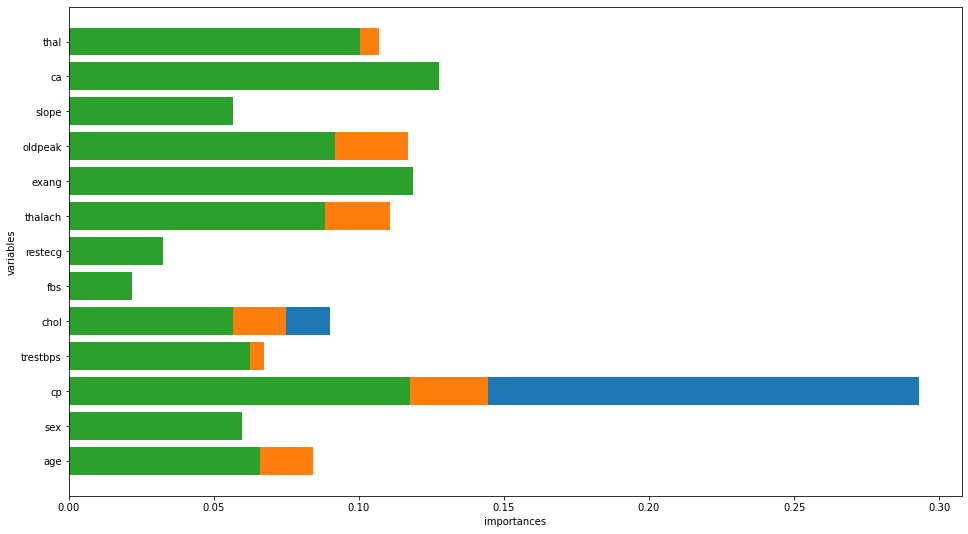

In [4]:
# 특성중요도
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"] = (16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("variables")
    plt.ylim(-1, n_features)

plot_tree(model1)
plot_tree(model2)
plot_tree(model3)

### [실습] 부스팅 - 당뇨병 데이터셋

In [5]:
#데이터셋 로드
import pandas as pd
df = pd.read_csv("datasets/diabetes.csv")

#타깃 데이터 개수 확인
print("원본:", df["outcome"].value_counts())

#학습용 피처 설정
train_cols = df.columns[0:8]

#독립변수 & 종속변수
X = df[train_cols]
y = df["outcome"]

#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['outcome'])

#샘플링 데이터프레임만들기
df_samp = pd.concat([X_samp, y_samp], axis=1)

#샘플링 데이터 개수 확인
print("샘플링:", df_samp["outcome"].value_counts())

#독립변수 & 종속변수 (샘플링데이터셋)
X = df_samp[train_cols]
y = df_samp["outcome"]

# 학습용 & 검증용 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

# adaboost
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)

print(model_ada.predict(X_test))
print(model_ada.score(X_train, y_train))
print(model_ada.score(X_test, y_test))

원본: 0    500
1    268
Name: outcome, dtype: int64
샘플링: 0    268
1    268
Name: outcome, dtype: int64
[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1]
0.8761682242990654
0.6944444444444444


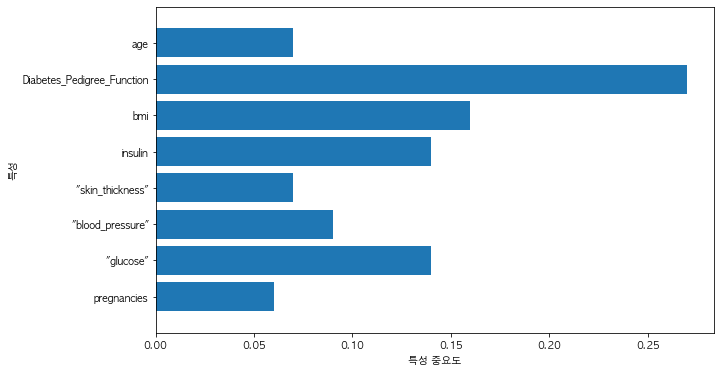

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def plot_tree(model):
    plt.figure(figsize=(10, 6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

plot_tree(model_ada)

#### [실습] Adaboost

In [7]:
from sklearn.svm import SVC 
svc = SVC(probability=True, kernel='linear')
model_svc = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, base_estimator=svc)
model_svc.fit(X_train, y_train)

print(model_svc.predict(X_test))
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.7429906542056075
0.6851851851851852


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.29 µs
[0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
0.9228971962616822
0.75


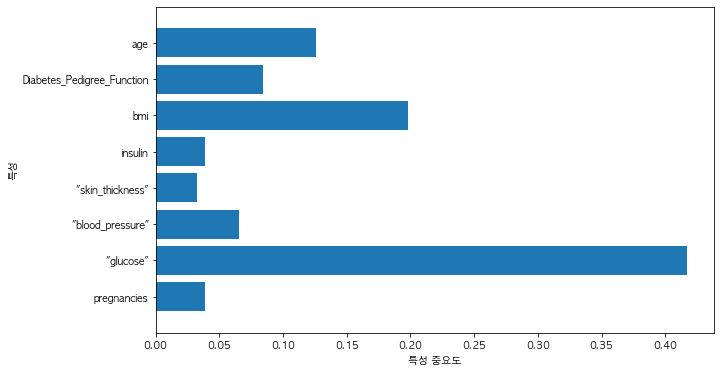

In [8]:
# GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)

%time
model_grad.fit(X_train, y_train)

print(model_grad.predict(X_test))
print(model_grad.score(X_train, y_train))
print(model_grad.score(X_test, y_test))

plot_tree(model_grad)

In [9]:
# # XGBoost

from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=100, max_depth=3, random_state=0)

%time
model_xgb.fit(X_train, y_train)

print(model_xgb.predict(X_test))
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))

plot_tree(model_xgb)

Error: Canceled future for execute_request message before replies were done

### [실습] Lightgbm
- GOSS(Gradient based One Side Sampling)을 통해 데이터의 일부만으로 빠르게 정보이득을 계산하고, EFM(Exclusive Feature Bundling)을 통해 Feature를 획기적으로 감소시킴
- XGBoost보다 성능이 좋음
- 정보이득 : 어떤 속성을 선택함으로 인하여 데이터를 더 잘 구분하게 되는 특성
- 범주형 변수를 원핫인코딩하면 변수가 너무 많아져서 계산이 오래걸리는데, lightgbm 알고리즘을 통해 문제극복

In [ ]:
import lightgbm
model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=3, random_state=0)
model_lgbm.fit(X_train, y_train)
print(model_lgbm.predict(X_test))
print(model_lgbm.score(X_train, y_train))
print(model_lgbm.score(X_test, y_test))

plot_tree(model_lgbm)

### [실습] 트리모형의 교차검증 (1)

Index(['sepal length (cm)', ' sepal width (cm)', ' petal length (cm)',
       ' petal width (cm)', 'Result'],
      dtype='object')
0.9733333333333333
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=0)
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.9533333333333334


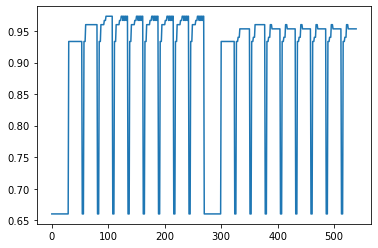

In [20]:
import pandas as pd
df = pd.read_csv('datasets/iris.csv')
print(df.columns)
cols = ['sepal length (cm)', ' sepal width (cm)', ' petal length (cm)',' petal width (cm)']
X = df[cols]
y = df["Result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : list(range(1, 11)),
    'criterion' : ['gini', 'entropy'],
    'max_leaf_nodes': list(range(2, 11)),
    'min_samples_split' : [2,3,4]
}
gcv = GridSearchCV(model, params, cv=3)
gcv.fit(X, y)

scores = gcv.cv_results_["mean_test_score"]

%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(scores)

#최고정확도
print(gcv.best_score_)
#최적의 파라미터
print(gcv.best_params_)
#최고 모형
print(gcv.best_estimator_)

#최적의 파라미터를 적용한 모형
from sklearn.model_selection import cross_val_score
import numpy as np
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes=7, min_samples_split=2, random_state=0)
result = cross_val_score(tree, X, y, cv=10)

#교차검증 결과
print(result)

#교차검증 평균값
print(np.mean(result))


### [실습] 트리모형의 교차검증 (2)

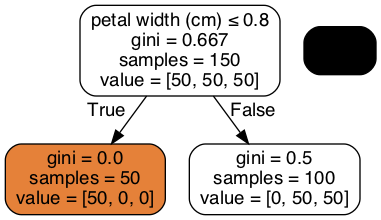

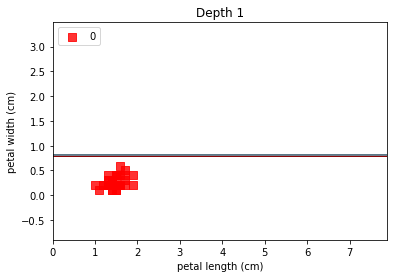

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


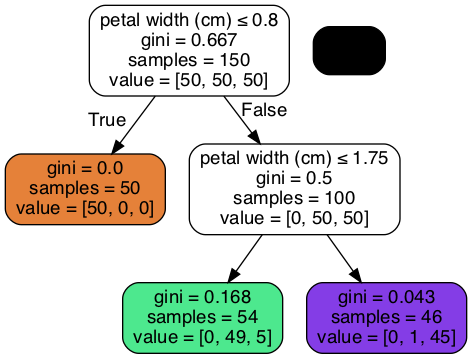

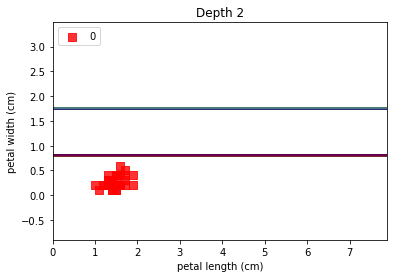

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


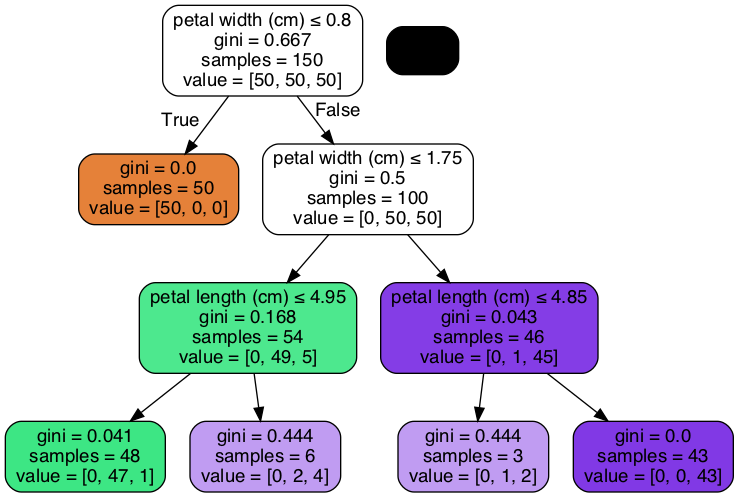

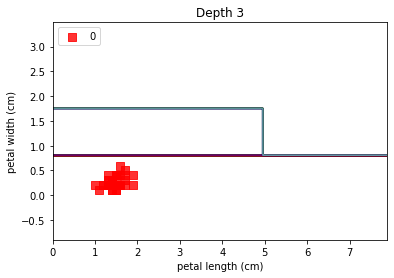

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


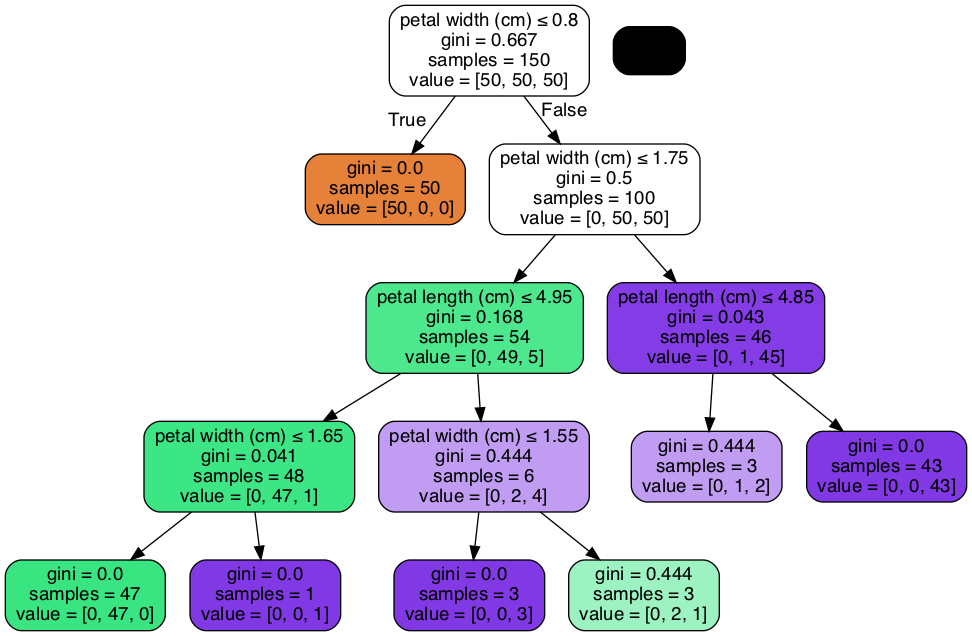

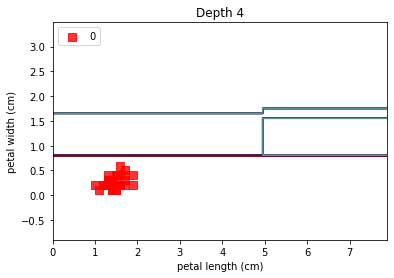

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


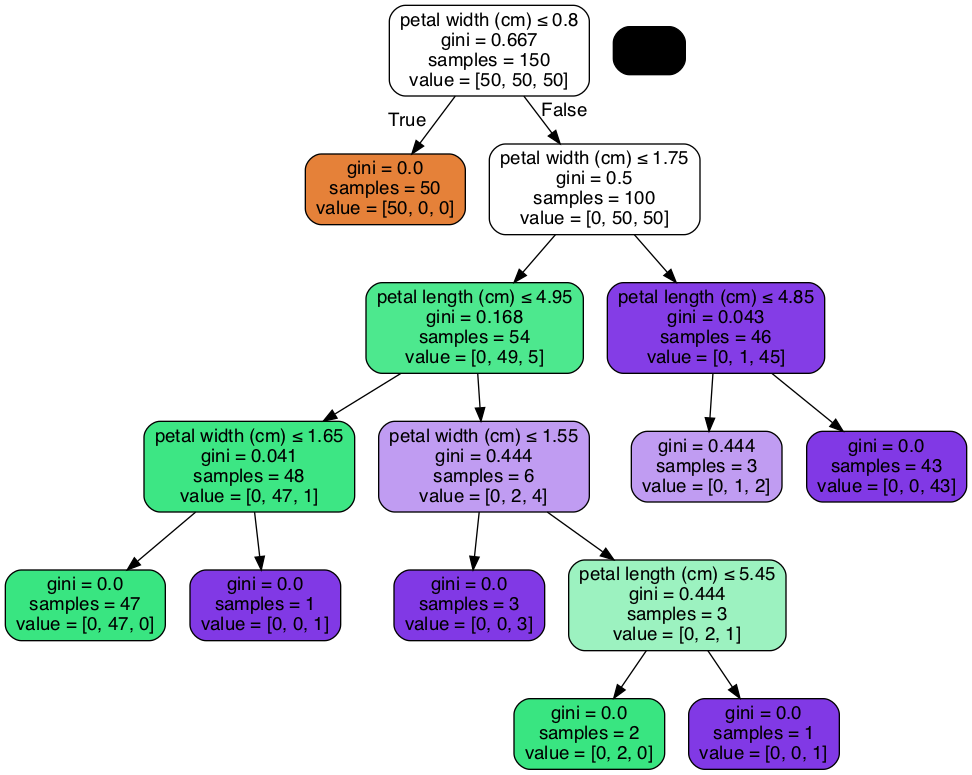

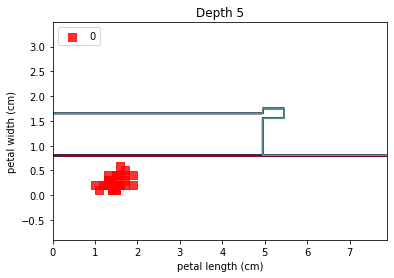

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

1 fold


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data[:, 2:]
y = data.target

feature_names = data.feature_names[2:]

%matplotlib inline
import io
from sklearn import tree
import seaborn as sns 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image, display
import pydotplus

def draw_decision_tree(model):
    dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

def plot_decision_regions(X, y, model, title):
    resoultions = 0.01
    markers = ('s','^','o')
    colors = ('red','blue','lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 정방행렬 만들기
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resoultions), np.arange(x2_min, x2_max, resoultions))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    # 등고선, 2차원 넘파이 배열
    plt.contour(xx1, xx2, Z, colors='k')
    plt.contour(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
        plt.xlabel(data.feature_names[2])
        plt.ylabel(data.feature_names[3])
        plt.legend(loc='upper left')
        plt.title(title)
        return Z
    
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

for i in range(1,6):
    plt.figure()
    model = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X, y)
    display(draw_decision_tree(model))
    plot_decision_regions(X, y, model, f"Depth {i}")
    plt.show()
    print(confusion_matrix(y, model.predict(X)))
    

from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=0)
i = 1
train_scores = []
test_scores = []
for train_index, test_index in cv.split(X, y):
    print(i, 'fold')
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(score)
    train_scores.append(score)
    i += 1

print('\naverage')
print(np.mean(train_scores))
print(np.mean(test_scores))

model = DecisionTreeClassifier(random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()   